In [2]:
import matplotlib.pyplot as plotter_lib

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

from keras.layers.core import Dense

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
import pathlib

In [2]:
data_directory = pathlib.Path('F:\\EEG\\Zero')

In [3]:
data_directory1 = pathlib.Path(data_directory)

In [4]:
img_height,img_width=180,180

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 4120 files for training.


In [5]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 1030 files for validation.


In [6]:
# import matplotlib.pyplot as plotter_lib

# plotter_lib.figure(figsize=(10, 10))

# epochs=10

# for images, labels in train_ds.take(1):

#   for var in range(6):

#     ax = plt.subplot(3, 3, var + 1)

#     plotter_lib.imshow(images[var].numpy().astype("uint8"))

#     plotter_lib.axis("off")*

In [7]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [8]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))
demo_resnet_model.add(Dense(2, activation='sigmoid'))

In [9]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

<Figure size 1000x1000 with 0 Axes>

In [10]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [11]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))

demo_resnet_model.add(Dense(2, activation='sigmoid'))

In [12]:
demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
129/129 [==============================] - 267s 2s/step - loss: 0.3307 - accuracy: 0.8794 - val_loss: 0.2941 - val_accuracy: 0.8757
Epoch 2/10
129/129 [==============================] - 252s 2s/step - loss: 0.2799 - accuracy: 0.8862 - val_loss: 0.2737 - val_accuracy: 0.8883
Epoch 3/10
129/129 [==============================] - 253s 2s/step - loss: 0.2556 - accuracy: 0.8951 - val_loss: 0.3118 - val_accuracy: 0.8777
Epoch 4/10
129/129 [==============================] - 250s 2s/step - loss: 0.2454 - accuracy: 0.9017 - val_loss: 0.3707 - val_accuracy: 0.8748
Epoch 5/10
129/129 [==============================] - 237s 2s/step - loss: 0.2324 - accuracy: 0.9034 - val_loss: 0.2795 - val_accuracy: 0.8874
Epoch 6/10
129/129 [==============================] - 234s 2s/step - loss: 0.2222 - accuracy: 0.9078 - val_loss: 0.2830 - val_accuracy: 0.8932
Epoch 7/10
129/129 [==============================] - 231s 2s/step - loss: 0.2147 - accuracy: 0.9131 - val_loss: 0.2543 - val_accuracy: 0.8961

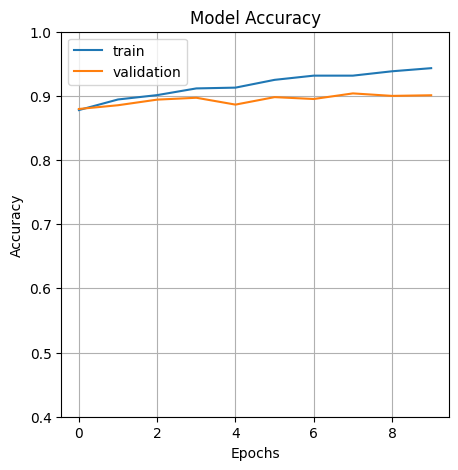

In [33]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [14]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


33/33 [==============================] - 47s 1s/step
Accuracy: 0.8135922330097087
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       899
           1       0.13      0.08      0.10       131

    accuracy                           0.81      1030
   macro avg       0.50      0.50      0.50      1030
weighted avg       0.78      0.81      0.80      1030



### VGG-16


In [16]:
demo_vgg_16_model = Sequential()

pretrained_model_for_vgg_16_demo= tflow.keras.applications.VGG16(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_vgg_16_demo.layers:

        each_layer.trainable=False

demo_vgg_16_model.add(pretrained_model_for_demo)

In [17]:
demo_vgg_16_model.add(Flatten())

demo_vgg_16_model.add(Dense(512, activation='relu'))
demo_vgg_16_model.add(Dense(128, activation='relu'))
demo_vgg_16_model.add(Dense(2, activation='sigmoid'))

In [18]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

<Figure size 1000x1000 with 0 Axes>

In [19]:
demo_vgg_16_model = Sequential()

pretrained_model_for_vgg_16_demo= tflow.keras.applications.VGG16(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_vgg_16_demo.layers:

        each_layer.trainable=False

demo_vgg_16_model.add(pretrained_model_for_vgg_16_demo)

In [20]:
demo_vgg_16_model.add(Flatten())

demo_vgg_16_model.add(Dense(512, activation='relu'))
demo_vgg_16_model.add(Dense(128, activation='relu'))

demo_vgg_16_model.add(Dense(2, activation='sigmoid'))

In [21]:
demo_vgg_16_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_vgg_16_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
129/129 [==============================] - 426s 3s/step - loss: 0.3141 - accuracy: 0.8794 - val_loss: 0.2971 - val_accuracy: 0.8825
Epoch 2/10
129/129 [==============================] - 429s 3s/step - loss: 0.2568 - accuracy: 0.9005 - val_loss: 0.2820 - val_accuracy: 0.8874
Epoch 3/10
129/129 [==============================] - 438s 3s/step - loss: 0.2346 - accuracy: 0.9155 - val_loss: 0.2660 - val_accuracy: 0.8903
Epoch 4/10
129/129 [==============================] - 424s 3s/step - loss: 0.2214 - accuracy: 0.9107 - val_loss: 0.2757 - val_accuracy: 0.8874
Epoch 5/10
129/129 [==============================] - 422s 3s/step - loss: 0.2011 - accuracy: 0.9180 - val_loss: 0.2746 - val_accuracy: 0.8757
Epoch 6/10
129/129 [==============================] - 420s 3s/step - loss: 0.1879 - accuracy: 0.9265 - val_loss: 0.2934 - val_accuracy: 0.8922
Epoch 7/10
129/129 [==============================] - 421s 3s/step - loss: 0.1690 - accuracy: 0.9367 - val_loss: 0.2906 - val_accuracy: 0.8942

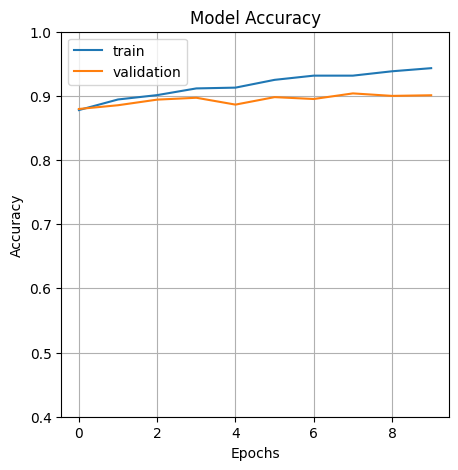

In [34]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [23]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [24]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_vgg_16_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

33/33 [==============================] - 85s 3s/step
Accuracy: 0.8019417475728156
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       899
           1       0.13      0.10      0.11       131

    accuracy                           0.80      1030
   macro avg       0.50      0.50      0.50      1030
weighted avg       0.78      0.80      0.79      1030



### VGG 19\

In [25]:
demo_vgg_19_model = Sequential()

pretrained_model_for_vgg_19_demo= tflow.keras.applications.VGG19(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_vgg_19_demo.layers:

        each_layer.trainable=False

demo_vgg_19_model.add(pretrained_model_for_vgg_19_demo)

In [26]:
demo_vgg_19_model.add(Flatten())

demo_vgg_19_model.add(Dense(512, activation='relu'))
demo_vgg_19_model.add(Dense(128, activation='relu'))

demo_vgg_19_model.add(Dense(2, activation='sigmoid'))

In [27]:
demo_vgg_19_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_vgg_19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
129/129 [==============================] - 540s 4s/step - loss: 0.3557 - accuracy: 0.8779 - val_loss: 0.3131 - val_accuracy: 0.8796
Epoch 2/10
129/129 [==============================] - 528s 4s/step - loss: 0.2674 - accuracy: 0.8944 - val_loss: 0.3090 - val_accuracy: 0.8854
Epoch 3/10
129/129 [==============================] - 527s 4s/step - loss: 0.2481 - accuracy: 0.9012 - val_loss: 0.2760 - val_accuracy: 0.8942
Epoch 4/10
129/129 [==============================] - 531s 4s/step - loss: 0.2263 - accuracy: 0.9117 - val_loss: 0.2846 - val_accuracy: 0.8971
Epoch 5/10
129/129 [==============================] - 524s 4s/step - loss: 0.2179 - accuracy: 0.9129 - val_loss: 0.2821 - val_accuracy: 0.8864
Epoch 6/10
129/129 [==============================] - 519s 4s/step - loss: 0.1968 - accuracy: 0.9250 - val_loss: 0.2662 - val_accuracy: 0.8981
Epoch 7/10
129/129 [==============================] - 3147s 25s/step - loss: 0.1748 - accuracy: 0.9316 - val_loss: 0.3348 - val_accuracy: 0.89

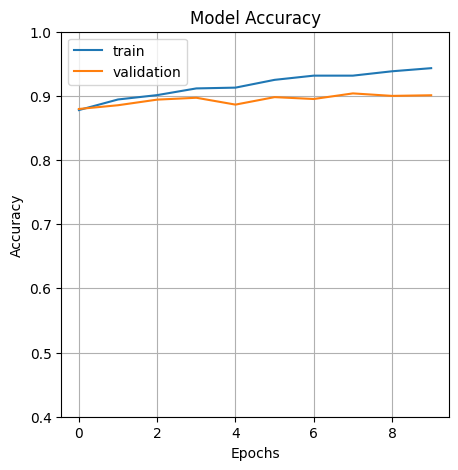

In [35]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [29]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [30]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_vgg_19_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

33/33 [==============================] - 105s 3s/step
Accuracy: 0.8116504854368932
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       899
           1       0.11      0.07      0.08       131

    accuracy                           0.81      1030
   macro avg       0.49      0.49      0.49      1030
weighted avg       0.77      0.81      0.79      1030



In [32]:
### Resnet-101 batch_size=32



demo_resnet_model_resnet_101 = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model_resnet_101.add(pretrained_model_for_demo)



demo_resnet_model_resnet_101.add(Flatten())

demo_resnet_model_resnet_101.add(Dense(512, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(128, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(2, activation='sigmoid'))


import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

<Figure size 1000x1000 with 0 Axes>

In [36]:
demo_resnet_model_resnet_101.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model_resnet_101.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
129/129 [==============================] - 412s 3s/step - loss: 0.3145 - accuracy: 0.8813 - val_loss: 0.2975 - val_accuracy: 0.8816
Epoch 2/10
129/129 [==============================] - 395s 3s/step - loss: 0.2774 - accuracy: 0.8910 - val_loss: 0.2943 - val_accuracy: 0.8825
Epoch 3/10
129/129 [==============================] - 391s 3s/step - loss: 0.2538 - accuracy: 0.8956 - val_loss: 0.2833 - val_accuracy: 0.8796
Epoch 4/10
129/129 [==============================] - 394s 3s/step - loss: 0.2481 - accuracy: 0.9010 - val_loss: 0.2664 - val_accuracy: 0.8922
Epoch 5/10
129/129 [==============================] - 389s 3s/step - loss: 0.2391 - accuracy: 0.9066 - val_loss: 0.2690 - val_accuracy: 0.8883
Epoch 6/10
129/129 [==============================] - 389s 3s/step - loss: 0.2224 - accuracy: 0.9124 - val_loss: 0.2837 - val_accuracy: 0.8903
Epoch 7/10
129/129 [==============================] - 389s 3s/step - loss: 0.2152 - accuracy: 0.9170 - val_loss: 0.2635 - val_accuracy: 0.8942

In [3]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

NameError: name 'epochs' is not defined

<Figure size 500x500 with 0 Axes>

In [38]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [39]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model_resnet_101.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

33/33 [==============================] - 81s 2s/step
Accuracy: 0.8106796116504854
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       899
           1       0.07      0.04      0.05       131

    accuracy                           0.81      1030
   macro avg       0.47      0.48      0.47      1030
weighted avg       0.77      0.81      0.79      1030



In [40]:
### Resnet-101 batch_size=16

In [41]:
img_height,img_width=180,180

batch_size=16

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 4120 files for training.


In [42]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 1030 files for validation.


In [43]:
demo_resnet_model_resnet_101 = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model_resnet_101.add(pretrained_model_for_demo)



demo_resnet_model_resnet_101.add(Flatten())

demo_resnet_model_resnet_101.add(Dense(512, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(128, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(2, activation='sigmoid'))


import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

<Figure size 1000x1000 with 0 Axes>

In [44]:
demo_resnet_model_resnet_101.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model_resnet_101.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
258/258 [==============================] - 414s 2s/step - loss: 0.3124 - accuracy: 0.8803 - val_loss: 0.2987 - val_accuracy: 0.8806
Epoch 2/10
258/258 [==============================] - 423s 2s/step - loss: 0.2803 - accuracy: 0.8903 - val_loss: 0.3285 - val_accuracy: 0.8806
Epoch 3/10
258/258 [==============================] - 408s 2s/step - loss: 0.2556 - accuracy: 0.9007 - val_loss: 0.2769 - val_accuracy: 0.8864
Epoch 4/10
258/258 [==============================] - 403s 2s/step - loss: 0.2520 - accuracy: 0.8968 - val_loss: 0.3056 - val_accuracy: 0.8845
Epoch 5/10
258/258 [==============================] - 404s 2s/step - loss: 0.2341 - accuracy: 0.9083 - val_loss: 0.3616 - val_accuracy: 0.8786
Epoch 6/10
258/258 [==============================] - 402s 2s/step - loss: 0.2209 - accuracy: 0.9117 - val_loss: 0.3001 - val_accuracy: 0.8825
Epoch 7/10
258/258 [==============================] - 400s 2s/step - loss: 0.2202 - accuracy: 0.9100 - val_loss: 0.2719 - val_accuracy: 0.8971

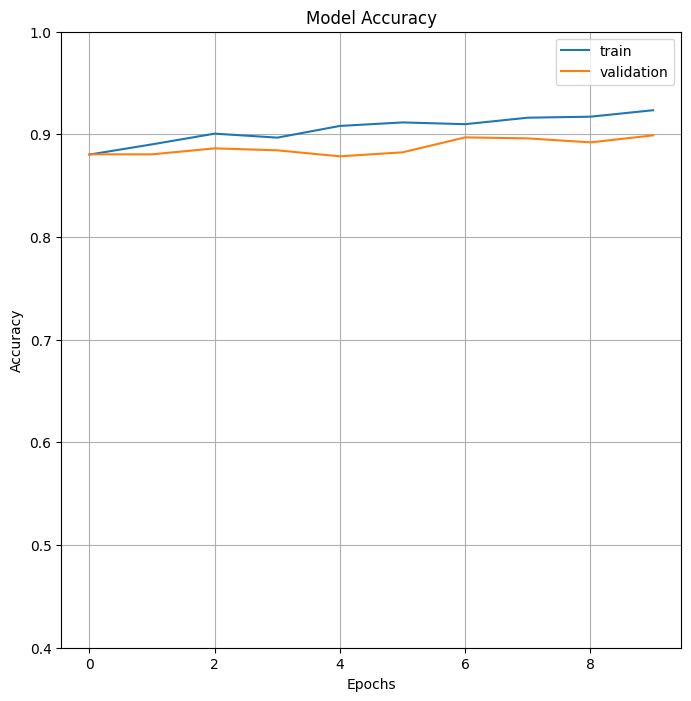

In [46]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [47]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [48]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model_resnet_101.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

65/65 [==============================] - 97s 1s/step
Accuracy: 0.8252427184466019
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       899
           1       0.11      0.05      0.07       131

    accuracy                           0.83      1030
   macro avg       0.49      0.50      0.49      1030
weighted avg       0.78      0.83      0.80      1030



In [ ]:
### Resnet-101 batch_size=8

In [51]:
img_height,img_width=180,180

batch_size=8

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 4120 files for training.


In [52]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 1030 files for validation.


In [53]:
demo_resnet_model_resnet_101 = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model_resnet_101.add(pretrained_model_for_demo)



demo_resnet_model_resnet_101.add(Flatten())

demo_resnet_model_resnet_101.add(Dense(512, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(128, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(2, activation='sigmoid'))


import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

<Figure size 1000x1000 with 0 Axes>

In [54]:
demo_resnet_model_resnet_101.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model_resnet_101.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
515/515 [==============================] - 473s 902ms/step - loss: 0.3166 - accuracy: 0.8828 - val_loss: 0.3136 - val_accuracy: 0.8816
Epoch 2/10
515/515 [==============================] - 445s 865ms/step - loss: 0.2792 - accuracy: 0.8896 - val_loss: 0.3069 - val_accuracy: 0.8816
Epoch 3/10
515/515 [==============================] - 446s 866ms/step - loss: 0.2608 - accuracy: 0.8966 - val_loss: 0.2859 - val_accuracy: 0.8816
Epoch 4/10
515/515 [==============================] - 450s 873ms/step - loss: 0.2436 - accuracy: 0.9027 - val_loss: 0.2936 - val_accuracy: 0.8845
Epoch 5/10
515/515 [==============================] - 498s 967ms/step - loss: 0.2297 - accuracy: 0.9087 - val_loss: 0.2900 - val_accuracy: 0.8874
Epoch 6/10
515/515 [==============================] - 595s 1s/step - loss: 0.2288 - accuracy: 0.9083 - val_loss: 0.2657 - val_accuracy: 0.8913
Epoch 7/10
515/515 [==============================] - 477s 926ms/step - loss: 0.2145 - accuracy: 0.9100 - val_loss: 0.2920 - va

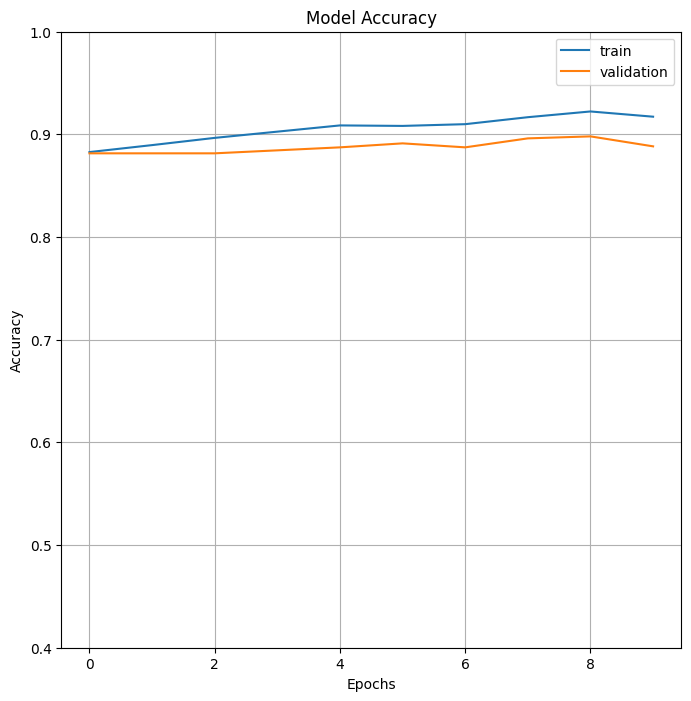

In [56]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [57]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [58]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model_resnet_101.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

129/129 [==============================] - 96s 713ms/step
Accuracy: 0.7776699029126214
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       899
           1       0.07      0.06      0.07       131

    accuracy                           0.78      1030
   macro avg       0.47      0.47      0.47      1030
weighted avg       0.76      0.78      0.77      1030



In [59]:
### Resnet-101 batch_size=64

In [60]:
img_height,img_width=180,180

batch_size=64

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 4120 files for training.


In [61]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 5150 files belonging to 2 classes.
Using 1030 files for validation.


In [62]:
demo_resnet_model_resnet_101 = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet101(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model_resnet_101.add(pretrained_model_for_demo)



demo_resnet_model_resnet_101.add(Flatten())

demo_resnet_model_resnet_101.add(Dense(512, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(128, activation='relu'))
demo_resnet_model_resnet_101.add(Dense(2, activation='sigmoid'))


import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

<Figure size 1000x1000 with 0 Axes>

In [63]:
demo_resnet_model_resnet_101.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model_resnet_101.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
65/65 [==============================] - 419s 6s/step - loss: 0.3325 - accuracy: 0.8748 - val_loss: 0.3146 - val_accuracy: 0.8806
Epoch 2/10
65/65 [==============================] - 401s 6s/step - loss: 0.2749 - accuracy: 0.8949 - val_loss: 0.2953 - val_accuracy: 0.8825
Epoch 3/10
65/65 [==============================] - 399s 6s/step - loss: 0.2732 - accuracy: 0.8937 - val_loss: 0.2829 - val_accuracy: 0.8796
Epoch 4/10
65/65 [==============================] - 397s 6s/step - loss: 0.2404 - accuracy: 0.9027 - val_loss: 0.2944 - val_accuracy: 0.8835
Epoch 5/10
65/65 [==============================] - 397s 6s/step - loss: 0.2260 - accuracy: 0.9100 - val_loss: 0.2866 - val_accuracy: 0.8825
Epoch 6/10
65/65 [==============================] - 396s 6s/step - loss: 0.2364 - accuracy: 0.9049 - val_loss: 0.2685 - val_accuracy: 0.8942
Epoch 7/10
65/65 [==============================] - 392s 6s/step - loss: 0.2032 - accuracy: 0.9201 - val_loss: 0.2607 - val_accuracy: 0.8942
Epoch 8/10
65

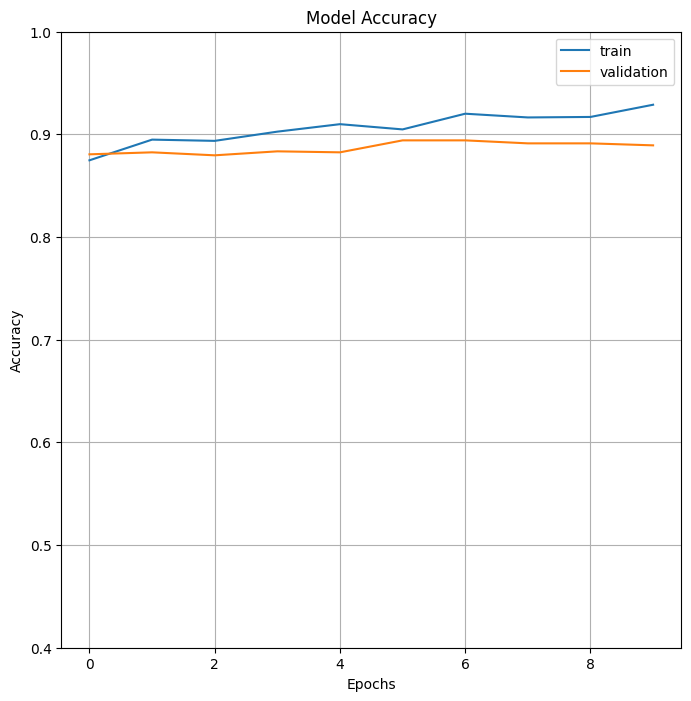

In [64]:
plotter_lib.figure(figsize=(8, 8))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [65]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [66]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model_resnet_101.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

17/17 [==============================] - 89s 5s/step
Accuracy: 0.8563106796116505
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       899
           1       0.05      0.01      0.01       131

    accuracy                           0.86      1030
   macro avg       0.46      0.49      0.47      1030
weighted avg       0.77      0.86      0.81      1030



In [68]:
### Resnet-50 batch_size=8






img_height,img_width=180,180

batch_size=8

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)




validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)



demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))

demo_resnet_model.add(Dense(2, activation='sigmoid'))



demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)













Found 5150 files belonging to 2 classes.
Using 4120 files for training.
Found 5150 files belonging to 2 classes.
Using 1030 files for validation.


Epoch 1/10
515/515 [==============================] - 275s 523ms/step - loss: 0.3180 - accuracy: 0.8820 - val_loss: 0.3030 - val_accuracy: 0.8728
Epoch 2/10
515/515 [==============================] - 264s 512ms/step - loss: 0.2784 - accuracy: 0.8891 - val_loss: 0.2788 - val_accuracy: 0.8864
Epoch 3/10
515/515 [==============================] - 263s 512ms/step - loss: 0.2672 - accuracy: 0.8915 - val_loss: 0.2732 - val_accuracy: 0.8835
Epoch 4/10
515/515 [==============================] - 271s 527ms/step - loss: 0.2466 - accuracy: 0.9000 - val_loss: 0.2707 - val_accuracy: 0.8864
Epoch 5/10
515/515 [==============================] - 264s 513ms/step - loss: 0.2350 - accuracy: 0.9012 - val_loss: 0.2676 - val_accuracy: 0.8864
Epoch 6/10
515/515 [==============================] - 268s 520ms/step - loss: 0.2280 - accuracy: 0.9087 - val_loss: 0.2615 - val_accuracy: 0.8893
Epoch 7/10
515/515 [==============================] - 279s 542ms/step - loss: 0.2175 - accuracy: 0.9085 - val_loss: 0.2534 -

<Figure size 1000x1000 with 0 Axes>

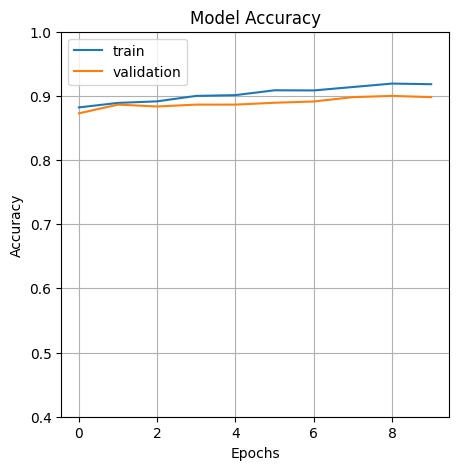

In [69]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [70]:

plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [71]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

129/129 [==============================] - 52s 395ms/step
Accuracy: 0.8223300970873786
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       899
           1       0.07      0.03      0.04       131

    accuracy                           0.82      1030
   macro avg       0.47      0.48      0.47      1030
weighted avg       0.77      0.82      0.79      1030



In [72]:
### Resnet-50 batch_size=16











img_height,img_width=180,180

batch_size=16

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)




validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)



demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))

demo_resnet_model.add(Dense(2, activation='sigmoid'))



demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)













Found 5150 files belonging to 2 classes.
Using 4120 files for training.
Found 5150 files belonging to 2 classes.
Using 1030 files for validation.


Epoch 1/10
258/258 [==============================] - 249s 948ms/step - loss: 0.3196 - accuracy: 0.8854 - val_loss: 0.2928 - val_accuracy: 0.8825
Epoch 2/10
258/258 [==============================] - 242s 939ms/step - loss: 0.2788 - accuracy: 0.8910 - val_loss: 0.3003 - val_accuracy: 0.8767
Epoch 3/10
258/258 [==============================] - 241s 935ms/step - loss: 0.2579 - accuracy: 0.8964 - val_loss: 0.2700 - val_accuracy: 0.8893
Epoch 4/10
258/258 [==============================] - 242s 936ms/step - loss: 0.2517 - accuracy: 0.8949 - val_loss: 0.2968 - val_accuracy: 0.8748
Epoch 5/10
258/258 [==============================] - 6193s 24s/step - loss: 0.2442 - accuracy: 0.8971 - val_loss: 0.3193 - val_accuracy: 0.8777
Epoch 6/10
258/258 [==============================] - 244s 945ms/step - loss: 0.2240 - accuracy: 0.9119 - val_loss: 0.2850 - val_accuracy: 0.8816
Epoch 7/10
258/258 [==============================] - 243s 942ms/step - loss: 0.2260 - accuracy: 0.9119 - val_loss: 0.2702 - 

<Figure size 1000x1000 with 0 Axes>

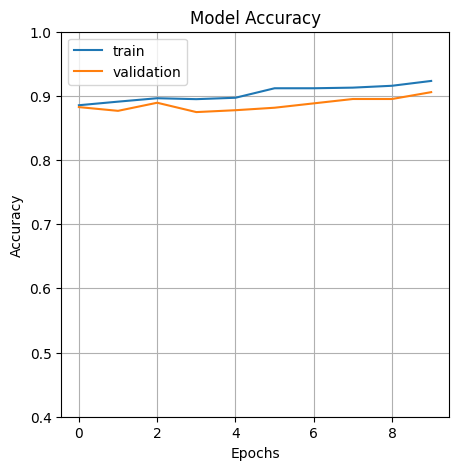

In [73]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [74]:

plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [75]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

65/65 [==============================] - 49s 733ms/step
Accuracy: 0.8126213592233009
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       899
           1       0.14      0.09      0.11       131

    accuracy                           0.81      1030
   macro avg       0.51      0.50      0.50      1030
weighted avg       0.78      0.81      0.80      1030



In [76]:
### Resnet-50 batch_size=64



















img_height,img_width=180,180

batch_size=64

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)




validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory1,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)



import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10


demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)



demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(128, activation='relu'))

demo_resnet_model.add(Dense(2, activation='sigmoid'))



demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

















Found 5150 files belonging to 2 classes.
Using 4120 files for training.
Found 5150 files belonging to 2 classes.
Using 1030 files for validation.


Epoch 1/10
65/65 [==============================] - 239s 4s/step - loss: 0.3586 - accuracy: 0.8740 - val_loss: 0.3144 - val_accuracy: 0.8748
Epoch 2/10
65/65 [==============================] - 230s 4s/step - loss: 0.2763 - accuracy: 0.8905 - val_loss: 0.2960 - val_accuracy: 0.8786
Epoch 3/10
65/65 [==============================] - 230s 4s/step - loss: 0.2867 - accuracy: 0.8891 - val_loss: 0.2947 - val_accuracy: 0.8893
Epoch 4/10
65/65 [==============================] - 229s 4s/step - loss: 0.2563 - accuracy: 0.8966 - val_loss: 0.2733 - val_accuracy: 0.8845
Epoch 5/10
65/65 [==============================] - 233s 4s/step - loss: 0.2364 - accuracy: 0.9027 - val_loss: 0.2675 - val_accuracy: 0.8874
Epoch 6/10
65/65 [==============================] - 247s 4s/step - loss: 0.2329 - accuracy: 0.9083 - val_loss: 0.2783 - val_accuracy: 0.8845
Epoch 7/10
65/65 [==============================] - 235s 4s/step - loss: 0.2170 - accuracy: 0.9136 - val_loss: 0.2560 - val_accuracy: 0.9000
Epoch 8/10
65

<Figure size 1000x1000 with 0 Axes>

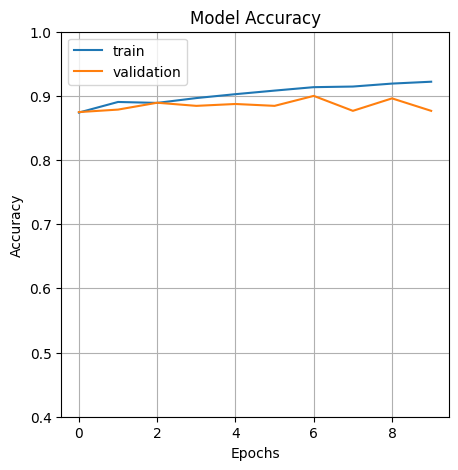

In [77]:
plotter_lib.figure(figsize=(5, 5))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.axis(ymin=0.4,ymax=1)

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [78]:

plotter_lib.show()

plotter_lib.savefig('output-plot.png') 

<Figure size 640x480 with 0 Axes>

In [79]:
from sklearn.metrics import classification_report, accuracy_score

# predict on test data
y_pred = demo_resnet_model.predict(validation_ds)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get true class labels
y_true = np.concatenate([y for x, y in validation_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# calculate precision, recall, f1-score
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

17/17 [==============================] - 47s 3s/step
Accuracy: 0.8689320388349514
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       899
           1       0.00      0.00      0.00       131

    accuracy                           0.87      1030
   macro avg       0.44      0.50      0.46      1030
weighted avg       0.76      0.87      0.81      1030

